In [0]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import RegexpTokenizer
from nltk.corpus import brown

import gensim

from sklearn.decomposition import PCA

from matplotlib import pyplot

In [0]:
nltk.download()

In [6]:
forgooglecolab = True
if forgooglecolab:
  from google.colab import files
  uploaded = files.upload()

Saving fulltext.txt to fulltext.txt


In [8]:
# Import element files with references of characteres, rivers, castles, forests
from google.colab import files
uploaded = files.upload()

Saving rivers_dictionary.txt to rivers_dictionary.txt
Saving castles_dictionary.txt to castles_dictionary.txt
Saving forests_dictionary.txt to forests_dictionary.txt
Saving characters_list.txt to characters_list.txt


In [0]:
filename = "../Embeddings/fulltext.txt"
if forgooglecolab:
  filename = "fulltext.txt"

file = open(filename)
lines = file.readlines()

In [0]:
def read_dictionary(file_name):
  file = open(file_name, 'r')

  dictionary = []

  for line in file.readlines():
    words = line.replace('\n', '').split(':')
    dictionary.append( [ w for w in words] )
  return dictionary

castles_d = read_dictionary("castles_dictionary.txt")
forests_d = read_dictionary("forests_dictionary.txt")
rivers_d = read_dictionary("rivers_dictionary.txt")

In [0]:
def read_list(file_name):
  file = open(file_name, 'r')

  l = []
  for line in file.readlines():
    l.append(line.replace('\n', ''))

  return l

characters_l = read_list("characters_list.txt")

In [0]:
castles_l = [ c[1] for c in castles_d ]
forests_l = [ f[1] for f in forests_d ]
rivers_l = [ r[1] for r in rivers_d ]

In [0]:
def replace_from_dictionaries(line):
  l = line

  # Replace castle names
  for castle in castles_d:
    l = l.replace(castle[0], castle[1])

  #replace rivers names
  for river in rivers_d:
    l = l.replace(river[0], river[1])

  #replace forests names
  for forest in forests_d:
    l = l.replace(forest[0], forest[1])

  return l

In [0]:
sentences = []
for line in lines:
    sentences.append(word_tokenize(replace_from_dictionaries(line)))

In [0]:
model = gensim.models.Word2Vec(sentences, sg=1, window=5)

In [19]:
x = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [0]:
def plotlist(list):
  x = []
  in_list = []
  for element in list:
    if element in model:
      x.append(model[element])
      in_list.append(element)

  result = pca.fit_transform(x)
  pyplot.scatter(result[:, 0], result[:, 1])
  for i, word in enumerate(in_list):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
  pyplot.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


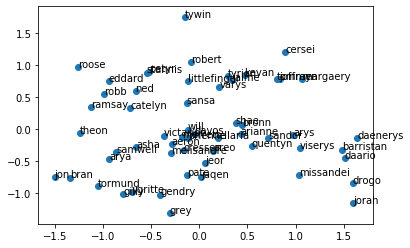

In [21]:
plotlist(characters_l)

In [0]:
characters = [
              'jon',
              'daenerys',
              'ned',
              'tyrion',
              'bran',
              'loras',
]

castles = [
           'winterfell',
           'riverrun',
           'the_redfort',
           'red_keep',
           'harrenhal',
           'highgarden',
           'dragonstone',
           'castle_black',
           'casterly_rock'
]

rivers = [
          'rhoyne',
          'torentine',
          'trident',
          'red_fork'
]

houses = [
          'stark',
          'targaryen',
          'lannister'
]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  import sys
/usr/local/lib

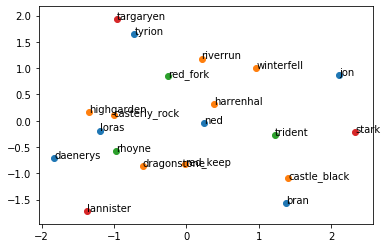

In [23]:
def plotlists(lists):
  in_list = []
  results = []
  for list in lists:
    x = []
    for element in list:
      if element in model:
        x.append(model[element])
        in_list.append(element)

    result = pca.fit_transform(x)
    results.append(result)
    pyplot.scatter(result[:, 0], result[:, 1])

  index = 0
  for result in results:
    for i, word in enumerate(in_list[index:index+len(result)]):
      if i == len(result):
        break
      pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
    index = index + len(result)
      
  pyplot.show()

plotlists([characters, castles, rivers, houses])